In [1]:
from math import sqrt
from numpy import arange
from numpy import meshgrid
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
import matplotlib.pyplot as plt

In [2]:
# objectivce function (isto sto i loss funkcija)
def objective_function(x, y):
    return x**2 + y**2

def derivative(x, y):
    return asarray([2.0*x, 2.0*y])

def Adam(objective, derivative,bounds,n_iter, step_size, beta1, beta2, eps=1e-8):
    # # track all solution
    solutions = list()
    # generate initial point
    solution = bounds[:, 0] + rand(len(bounds))*(bounds[:,1] - bounds[:, 0])
    # iitialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    # run grradient descent
    for it in range(n_iter):
        # calculating gradient
        gradient = derivative(solution[0], solution[1])

        new_solution = list()
        for i in range(solution.shape[0]):
            m[i] = beta1 * m[i] + (1.0 - beta1) * gradient[i]
            v[i] = beta2 * v[i] + (1.0 - beta2) * gradient[i]**2
            
            mhat = m[i] / (1.0 - beta1**(it+1))
            vhat = v[i] / (1.0 - beta2**(it+1))
            
            solution[i] = solution[i] - step_size * mhat / (sqrt(vhat) + eps)
            new_solution.append(solution[i])

        # evaluate candidate point
        solution = asarray(new_solution)
        solutions.append(solution)
        solution_eval = objective(solution[0], solution[1])

        # report progred
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
    return solutions
    

>0 f([-0.14595599  0.42064899]) = 0.19825
>1 f([-0.12613855  0.40070573]) = 0.17648
>2 f([-0.10665938  0.3808601 ]) = 0.15643
>3 f([-0.08770234  0.3611548 ]) = 0.13812
>4 f([-0.06947941  0.34163405]) = 0.12154
>5 f([-0.05222756  0.32234308]) = 0.10663
>6 f([-0.03620086  0.30332769]) = 0.09332
>7 f([-0.02165679  0.28463383]) = 0.08149
>8 f([-0.00883663  0.26630707]) = 0.07100
>9 f([0.00205801 0.24839209]) = 0.06170
>10 f([0.01088844 0.23093228]) = 0.05345
>11 f([0.01759677 0.2139692 ]) = 0.04609
>12 f([0.02221425 0.19754214]) = 0.03952
>13 f([0.02485859 0.18168769]) = 0.03363
>14 f([0.02572196 0.16643933]) = 0.02836
>15 f([0.02505339 0.15182705]) = 0.02368
>16 f([0.02313917 0.13787701]) = 0.01955
>17 f([0.02028406 0.12461125]) = 0.01594
>18 f([0.01679451 0.11204744]) = 0.01284
>19 f([0.01296436 0.10019867]) = 0.01021
>20 f([0.00906264 0.08907337]) = 0.00802
>21 f([0.00532366 0.07867522]) = 0.00622
>22 f([0.00193919 0.06900318]) = 0.00477
>23 f([-0.00094677  0.06005154]) = 0.00361
>24 f(

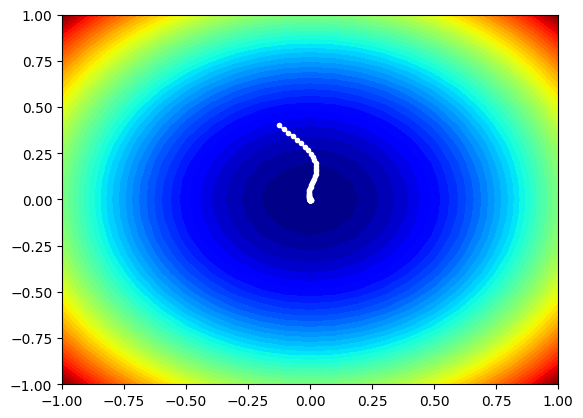

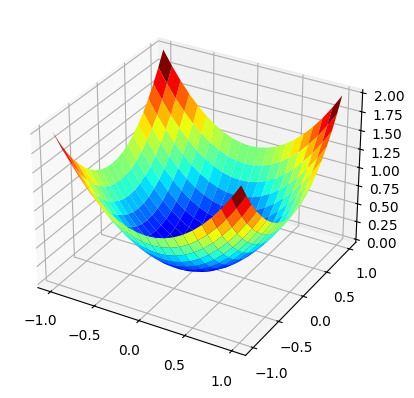

In [3]:
# seed the pseudo random number generator
seed(1)

bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
n_iter = 60
step_size = 0.02
beta1 = 0.8
beta2 = 0.999

solutions = Adam(objective_function, derivative, bounds, n_iter, step_size, beta1, beta2)

# print('Done!')
# print('f(%s) = %f' % (best, score))

# sample input range step 0.1
xaxis = arange(bounds[0, 0], bounds[0,1]+0.1, 0.1)
yaxis = arange(bounds[1, 0], bounds[1,1]+0.1, 0.1)
x, y = meshgrid(xaxis, yaxis)

#compute targer
results = objective_function(x, y)

# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
plt.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
plt.show()


# plot of inut vs result
figure = plt.figure()
axis = figure.add_subplot(111,projection='3d')
axis.plot_surface(x, y, results, cmap = 'jet')
plt.show()
